# Tensorflow常量与变量

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

tf.__version__


'2.10.0'

# 常量和变量

- Tensorflow
    - 基于图的数值计算的开源库
    - Tensorflow的核心是张量（Tensor）
    - 提供低级和高级的API
        - 低级API：Tensorflow Core
        - 高级API：Tensorflow Keras
- 张量
  - 向量和矩阵的泛化
  - 一组数据
  - 特定的形状

    

## 定义常量

In [2]:
credit = pd.read_csv('../data/credit.csv')
credit_numpy = credit.to_numpy()
credit.head()

,0,1,2,3
0,2.0,1.0,24.0,3913.0
1,2.0,2.0,26.0,2682.0
2,2.0,2.0,34.0,29239.0
3,2.0,1.0,37.0,46990.0
4,2.0,1.0,57.0,8617.0


In [3]:
# credit numpy 转为tensorflow的常量
credit_constant = tf.constant(credit_numpy)

#打印常量的数据类型。
print('数据的类型是:', credit_constant.dtype)

# 打印常量的形状
print('常量的类型是:', credit_constant.shape)

数据的类型是: <dtype: 'float64'>
常量的类型是: (30000, 4)


## 定义变量

与常量不同，变量的值可以修改。当我们想要通过更新模型的参数来训练模型时，这将非常有用。

In [4]:
# 定义1维变量A1
A1 = tf.Variable([1, 2, 3, 4])

# 打印1维变量A1
print(A1)

# 将A1转换为NumPy数组并将其赋值给B1。
B1 = A1.numpy()

# 打印 B1
print(B1)

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4])>
[1 2 3 4]


## 基本操作
- TensorFlow 操作
  - 一种围绕图(graph)使用的计算模型
  - 图包含边和节点，其中边是张量(tensors)，节点是操作(operation)
  
- 执行张量相加
  - `add()` 操作对两个张量执行**逐元素相加**
  - 逐元素相加要求两个张量具有相同的形状:
      - 标量加法：$1 + 2 = 3$
      - 向量相加：$[1, 2] + [3, 4] = [4, 6]$
      - 矩阵相加： $\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} + \begin{bmatrix} 5 & 6 \\ 7 & 8 \end{bmatrix} = \begin{bmatrix} 6 & 8 \\ 10 & 12 \end{bmatrix}$
  - 运算符可以通过符号 $+$ 进行重载

- 执行张量乘法
  - 使用`multiply()`操作执行**逐元素乘法**。
  - 使用`matmul()`运算符执行矩阵乘法。
    - `matmul(A,B)`操作--->将A与B相乘。
    - A的列数必须等于B的行数。

- 在张量维度上求和
  - `reduce_sum()`操作符在张量的维度上进行求和。 
    - `reduce_sum(A)` 在A张量的所有维度求和。
    - `reduce_sum(A, i)`在维度i上进行求和。

### 使用逐个元素相乘
在 TensorFlow 中，逐元素相乘需要使用具有相同形状的两个张量进行操作。这是因为该操作在两个张量中的对应位置上对元素进行相乘。下面是一个逐元素相乘的示例，用符号$\odot$ 表示：
$$ \begin{bmatrix} 1 & 2 \\ 2 & 1 \end{bmatrix} \odot \begin{bmatrix} 3 & 1 \\ 2 & 5 \end{bmatrix} = \begin{bmatrix} 3 & 2 \\ 4 & 5 \end{bmatrix} $$

在这个练习中，我们将执行逐元素相乘的操作，需要注意所相乘的**张量的形状**。

In [5]:

#定义A1和A23为常量
A1 = tf.constant([1, 2, 3, 4])
A23 = tf.constant([[1, 2, 3], [1, 6, 4]])


# 定义B1和B23的形状与A1和A23相同，但是所有元素都是1
B1 = tf.ones_like(A1)
B23 = tf.ones_like(A23)

# 使用逐元素相乘运算符将A1和B1相乘，将A23和B23相乘
C1 = tf.multiply(A1, B1)
C23 = tf.multiply(A23, B23)
# 打印C1和C23
# 打印C1和C23
print('C1: {}'.format(C1.numpy()))
print('C23: {}'.format(C23.numpy()))

C1: [1 2 3 4]
C23: [[1 2 3]
 [1 6 4]]


注意，使用全1张量进行逐元素相乘操作会保持原始张量不变。







### 通过矩阵乘法进行预测


在后面的章节中，您将学习训练线性回归模型。这个过程将产生一个参数向量，可以将其与输入数据相乘以生成预测结果。在这个练习中，您将使用输入数据`features`和目标向量 `bill`，它们取之前导入的信用卡数据集一组数据。

$$ \text{features} = \begin{bmatrix} 2 & 24 \\ 2 & 26 \\ 2 & 57 \\ 1 & 37 \end{bmatrix}, 
\text{bill} = \begin{bmatrix} 3913 \\ 2682 \\ 8617 \\ 64400 \end{bmatrix}, \text{params} = \begin{bmatrix} 1000 \\ 150 \end{bmatrix} $$

输入数据矩阵 `features` 包含两列：教育水平和年龄。目标向量 `bill` 是信用卡借款人账单的大小。

由于我们尚未训练模型，我们将为参数向量 `params`输入一个猜测值。然后，使用 `matmul()` 函数对 `features` 和 `params` 执行矩阵乘法，生成预测结果 `billpred`，并将其与 `bill` 进行比较。

In [6]:

#特征、参数和账单定义为常量
features = tf.constant([[2, 24], [2, 26], [2, 57], [1, 37]])
params = tf.constant([[1000], [150]])
bill = tf.constant([[3913], [2682], [8617], [64400]])
# 计算账单预测值
billpred = tf.matmul(features, params)
# 计算误差
error = bill-billpred

print(error.numpy())


[[-1687]
 [-3218]
 [-1933]
 [57850]]


### 在张量维度上求和
您已经获得了一个矩阵 'wealth'，它包含了五个人财富，以千元为单位表示。
$$\text{wealth} = \begin{bmatrix} 11 & 50 \\ 7 & 2 \\ 4 & 60 \\ 3 & 0 \\ 25 & 10 \end{bmatrix} $$

第一列对应债券，第二列对应股票。每一行表示一个人的债券和股票总财富。

0 表示要对矩阵的第一个维度进行求和操作，而 1 表示要对矩阵的第二个维度进行求和操作。
在一个二维度张量中0代表行，1代表列

In [7]:
#构建wealth张量
wealth = tf.constant([[11, 50], [7, 2], [4, 60], [3, 0], [25, 10]])


#计算五个人的总体财富
sum = tf.reduce_sum(wealth)
sum = sum.numpy()
print(sum)


#计算每个人财富
sum_people = tf.reduce_sum(wealth, 1)
sum_people= sum_people.numpy()
print(sum_people)


172
[61  9 64  3 35]


## TensorFlow进阶操作
- 寻找最优解
    - 在许多问题中，我们希望找到一个函数的最优解。
    - 例如，我们希望找到一个函数的最小值，这个函数可以是成本函数，也可以是损失函数。
- 我们可以使用`gradient()`实现这一点。
    - `gradient()`函数可以计算函数的梯度。
    - 梯度是函数的导数。
    - Optimum（最优解）：找到梯度为零的点
    


### 优化梯度的过程

假设一个损失函数`y=x^2`，最小化它。通过在不同的x值上使用`GradientTape()`操作计算斜率来实现这个目标。
如果斜率是正数，通过减小`x`可以降低损失。如果斜率是负数，通过增加`x`可以降低损失。这就是梯度下降的工作原理。

![gradient](../img/gradient_plot.png)









In [23]:
#构建计算提的函数
def compute_gradient(x0):
    # 定义变量x
    x = tf.Variable(x0)
        # y = x ^ 2
    with tf.GradientTape() as tape:
        y = tf.square(x)
    # 返回梯度
    return tape.gradient(y, x).numpy()

# 计算梯度
print(compute_gradient(-1.0))
print(compute_gradient(1.0))
print(compute_gradient(0.0))

-2.0
2.0
0.0


注意到在`x=1`处斜率为正，这意味着通过减小x可以降低损失。 在`x=-1`处斜率为负，这意味着通过增加x可以降低损失。 
在`x=0`处的斜率为0，这意味着无论是增加还是减少x都无法降低损失。这是因为当`x=0`时，损失最小。

### 重塑张量
将使用神经网络对手语字母图像进行分类。在某些情况下，神经网络将以一维张量作为输入，但数据将以图像的形式呈现，这些图像将是2维或3维张量，具体取决于它们是灰度图像还是彩色图像。

下图显示了手语字母A的灰度和彩色图像。这两个图像已经被导入并转换为numpy数组`gray_tensor`和`color_tensor`。请使用从tensorflow导入的`reshape`操作将这些数组重塑为一维向量。注意，`gray_tensor`的形状为28x28，`color_tensor`的形状为28x28x3。

![sign](../img/%E6%89%8B%E8%AF%AD.jpg)

In [24]:
#导入我们的图像的张量
gray_tensor = pd.read_csv('../data/gray_tensor.csv').to_numpy()

color_tensor = pd.read_csv('../data/color_tensor.csv').to_numpy().reshape(28, 28, 3)

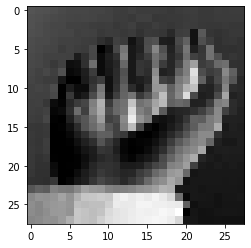

In [25]:
#还原我们导入的灰度图像
import matplotlib.pyplot as plt
plt.imshow(gray_tensor, cmap=plt.cm.binary)
plt.show()

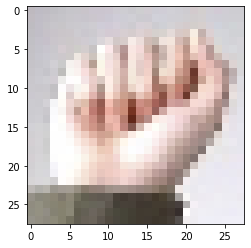

In [27]:
#还原我们导入的彩色
normalized_color_tensor = color_tensor.astype(float) / 255   # 将像素值归一化到[0, 1]
plt.imshow(normalized_color_tensor)
plt.show()

In [20]:
#将灰度图像转换为1维张量
gray_vector = tf.reshape(gray_tensor, (784, 1))

In [28]:
#将彩色图像转换为1维张量
#将图像输入到一维神经网络中，则需要将图像张量重塑为一维向量，因此使用(2352, 1)是正确的。
#使用卷积神经网络(CNN)等模型，则需要保留图像的形状和通道数量。在这种情况下，应该使用(28, 28, 3)来保留三通道彩色图像的形状。
color_vector = tf.reshape(color_tensor, (2352, 1))

### 处理图像数据
被给予一张以张量`letter`编码的黑白字母图像。假设确定这个字母是X还是K。没有训练好的神经网络，但有一个简单的模型`model`可以用来对`letter`进行分类。
有一个3x3的张量`letter`和一个1x3的张量`model`。可以通过将`letter`与`model`矩阵相乘，对结果求和，然后检查是否等于1来确定`letter`是否为K。


$$ Letter = \begin{bmatrix} 1.0 & 0 & 1.0 \\ 1. & 1 & 0 \\1.0 & 0 & 1.0 \end{bmatrix} $$
$$ model = \begin{bmatrix} 1.0 & 0 & -1.0 \end{bmatrix} $$

In [29]:
#构建我们上述的张量
letter = np.array([[1.0, 0, 1.0], [1., 1., 0], [1., 0, 1.] ])
model = np.array([[1., 0., -1.]])

In [30]:
#重塑矩阵 使得model与letter能够实现举证相乘
model = tf.reshape(model,(3,1))

#矩阵相乘，计算输出
output = tf.matmul(letter, model)

#对张量进行求和
prediction = tf.reduce_sum(output)
print(prediction.numpy())

1.0


你的模型发现`prediction=1.0`，并正确将该字母分类为K。